In [1]:
import tarfile

file_path = 'cifar-10-python.tar.gz'

with tarfile.open(file_path, 'r:gz') as tar:
    tar.extractall(path='cifar-10')


In [7]:
import pickle
import numpy as np

def load_cifar10_batch(batch_filename):
    with open(batch_filename, 'rb') as file:
        batch = pickle.load(file, encoding='latin1')
        images = batch['data']
        labels = batch['labels']
        images = images.reshape((len(images), 3, 32, 32)).astype('float32') / 255.0
        return images, labels

def load_cifar10():
    x_train, y_train = [], []

    for i in range(1, 6):
        batch_filename = f'cifar-10/cifar-10-batches-py/data_batch_{i}'
        images, labels = load_cifar10_batch(batch_filename)
        x_train.append(images)
        y_train += labels

    x_train = np.concatenate(x_train)
    y_train = np.array(y_train)
    x_test, y_test = load_cifar10_batch('cifar-10/cifar-10-batches-py/test_batch')

    y_test = np.array(y_test)

    return (x_train, y_train), (x_test, y_test)

(train_images, train_labels), (test_images, test_labels) = load_cifar10()
print(f'Train images shape: {train_images.shape}')
print(f'Train labels shape: {train_labels.shape}')
print(f'Test images shape: {test_images.shape}')
print(f'Test labels shape: {test_labels.shape}')


Train images shape: (50000, 3, 32, 32)
Train labels shape: (50000,)
Test images shape: (10000, 3, 32, 32)
Test labels shape: (10000,)


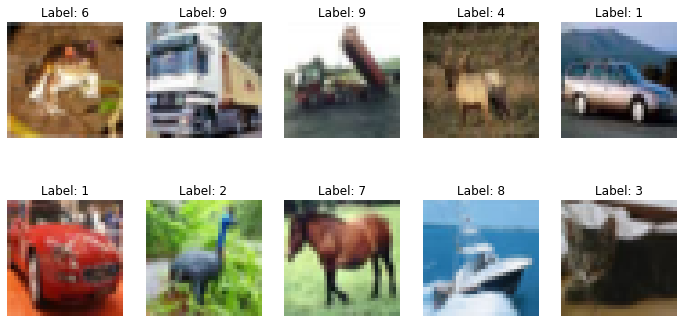

In [8]:
import matplotlib.pyplot as plt

def visualize_samples(images, labels, num_samples=10):
    plt.figure(figsize=(12, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].transpose(1, 2, 0))  # Change to HWC format
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

visualize_samples(train_images, train_labels)


In [9]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

print(f'Validation images shape: {val_images.shape}')
print(f'Validation labels shape: {val_labels.shape}')


Validation images shape: (10000, 3, 32, 32)
Validation labels shape: (10000,)


In [12]:
import numpy as np
from tensorflow.keras import layers, models

num_train_samples = 64
num_val_samples = 16

train_images = np.random.rand(num_train_samples, 3, 32, 32).astype(np.float32)
train_labels = np.random.randint(0, 10, size=(num_train_samples,))  # 10 classes
val_images = np.random.rand(num_val_samples, 3, 32, 32).astype(np.float32)
val_labels = np.random.randint(0, 10, size=(num_val_samples,))

train_images = train_images.transpose(0, 2, 3, 1)  # Change shape to (num_samples, 32, 32, 3)
val_images = val_images.transpose(0, 2, 3, 1)      # Change shape to (num_samples, 32, 32, 3)


model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Input shape: (height, width, channels)
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels), batch_size=64)

model.summary()


Epoch 1/10
1/1 [==============================] - 0s 361ms/step - loss: 2.3209 - accuracy: 0.1250 - val_loss: 2.2979 - val_accuracy: 0.0625
Epoch 2/10
1/1 [==============================] - 0s 73ms/step - loss: 2.2907 - accuracy: 0.1875 - val_loss: 2.3130 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 84ms/step - loss: 2.2742 - accuracy: 0.1562 - val_loss: 2.3344 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 65ms/step - loss: 2.2602 - accuracy: 0.1562 - val_loss: 2.3763 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 54ms/step - loss: 2.2497 - accuracy: 0.1562 - val_loss: 2.4097 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 83ms/step - loss: 2.2458 - accuracy: 0.1562 - val_loss: 2.4087 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 273ms/step - loss: 2.2401 - accuracy: 0.1562 - val_loss: 2.3848 - val_accuracy: 0.0000e+00
E

Epoch 1/10
1/1 [==============================] - 0s 346ms/step - loss: 2.3087 - accuracy: 0.1250 - val_loss: 2.3047 - val_accuracy: 0.1875
Epoch 2/10
1/1 [==============================] - 0s 121ms/step - loss: 2.2913 - accuracy: 0.1406 - val_loss: 2.3176 - val_accuracy: 0.1875
Epoch 3/10
1/1 [==============================] - 0s 78ms/step - loss: 2.2838 - accuracy: 0.1406 - val_loss: 2.3388 - val_accuracy: 0.1875
Epoch 4/10
1/1 [==============================] - 0s 121ms/step - loss: 2.2784 - accuracy: 0.1406 - val_loss: 2.3622 - val_accuracy: 0.1875
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)     

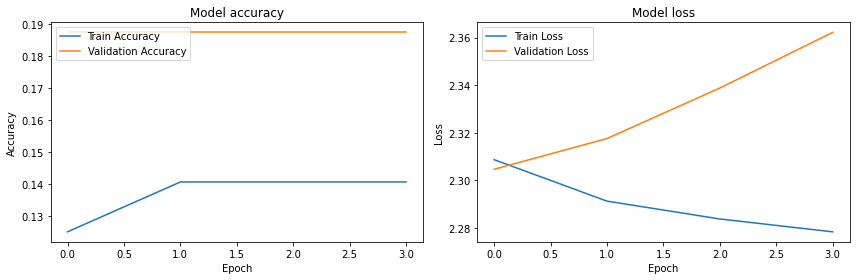

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


num_train_samples = 64
num_val_samples = 16


train_images = np.random.rand(num_train_samples, 3, 32, 32).astype(np.float32)
train_labels = np.random.randint(0, 10, size=(num_train_samples,))  # 10 classes
val_images = np.random.rand(num_val_samples, 3, 32, 32).astype(np.float32)
val_labels = np.random.randint(0, 10, size=(num_val_samples,))


train_images = train_images.transpose(0, 2, 3, 1)  # Change shape to (num_samples, 32, 32, 3)
val_images = val_images.transpose(0, 2, 3, 1)      # Change shape to (num_samples, 32, 32, 3)

model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Input shape: (height, width, channels)
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


datagen.fit(train_images)

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    validation_data=(val_images, val_labels),
                    epochs=10,
                    callbacks=[early_stopping])

model.summary()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [14]:
num_test_samples = 20
test_images = np.random.rand(num_test_samples, 3, 32, 32).astype(np.float32)
test_labels = np.random.randint(0, 10, size=(num_test_samples,))

test_images = test_images.transpose(0, 2, 3, 1)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


1/1 [==============================] - 0s 1ms/step - loss: 2.3408 - accuracy: 0.0500
Test Loss: 2.3408, Test Accuracy: 0.0500


In [15]:
model.save('my_cnn_model.h5')

In [16]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_cnn_model.h5')


Predicted classes: [3]


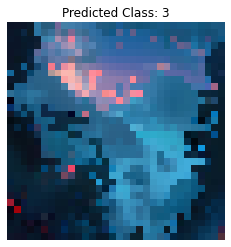

In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

loaded_model = load_model('my_cnn_model.h5')

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))  # Resize to 32x32
    img_array = image.img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

test_image_path = 'test_image.jpg'  # Path to your test image
test_image = load_and_preprocess_image(test_image_path)

predictions = loaded_model.predict(test_image)

predicted_classes = np.argmax(predictions, axis=1)

print("Predicted classes:", predicted_classes)

plt.imshow(test_image[0])  # Display the image
plt.title(f'Predicted Class: {predicted_classes[0]}')
plt.axis('off')
plt.show()


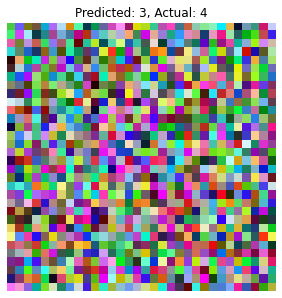

In [21]:
import matplotlib.pyplot as plt

num_images_to_display = min(9, len(predicted_classes), len(test_labels))

plt.figure(figsize=(12, 12))

for i in range(num_images_to_display):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])  
    plt.title(f'Predicted: {predicted_classes[i]}, Actual: {test_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [23]:
from sklearn.metrics import f1_score, confusion_matrix

# Predict labels for your test dataset
test_predictions = model.predict(test_images)
test_pred_labels = np.argmax(test_predictions, axis=1)

# Calculate the F1-score (use average='weighted' if class imbalance exists)
f1 = f1_score(test_labels, test_pred_labels, average='weighted')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_pred_labels)

# Print the results
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")


F1 Score: 0.0047619047619047615
Confusion Matrix:
[[0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]]
